In [41]:
#Import Libraries 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

OSEMN Pipeline

O - Obtaining our data

S - Scrubbing / Cleaning our data

E - Exploring / Visualizing our data will allow us to find patterns and trends

M - Modeling our data will give us our predictive power as a wizard

N - Interpreting our data


In [2]:
#read the data in 
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose

BloodPressure

SkinThickness

Insulin

BMI

### The above columns have min = 0, which is odd. Possible missing values which will be imputed with a central value after we look at some plots

In [7]:
#check missing values 
data.isnull().sum()/len(data)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Examine the target variable 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

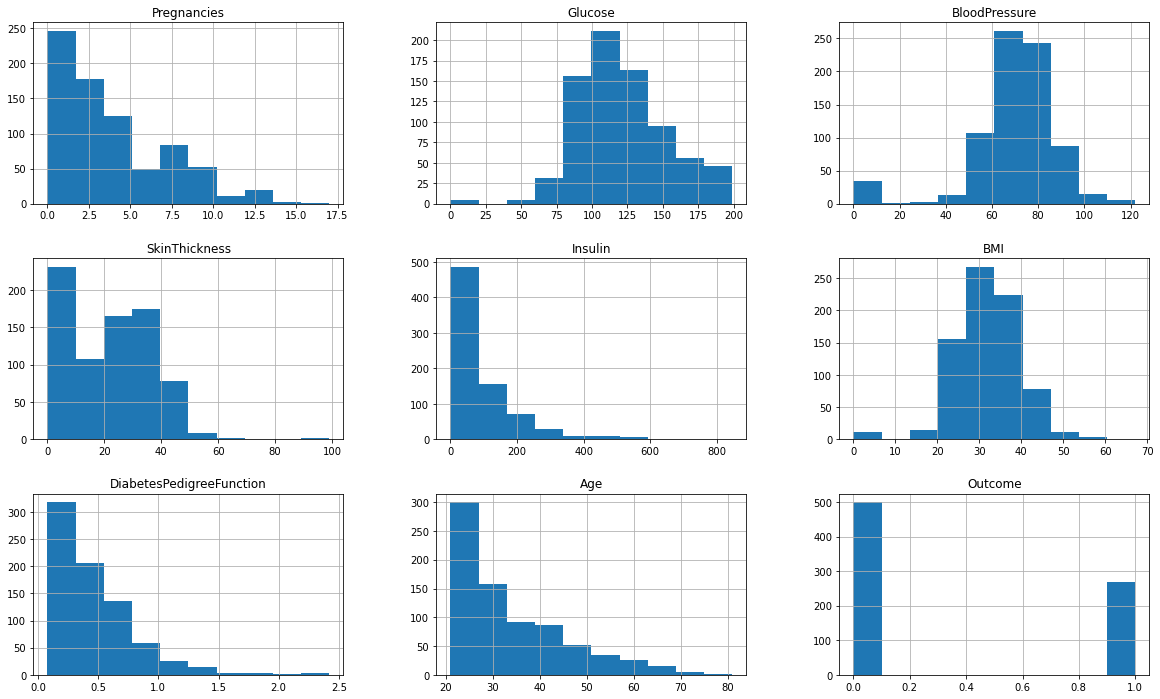

In [8]:
data.hist(figsize=(20,12))

If data has normal distribution we can impute with the mean

If the data is skewed we can impute with the median

Categorical data we can impute with mode

Glucose = mean

BloodPressure = mean

SkinThickness = median

Insulin = median

BMI = mean

no categorical data

In [9]:
cols_mean = ['Glucose', 'BloodPressure', 'BMI']
cols_med = ['SkinThickness', 'Insulin']

In [10]:
for f in data[cols_mean]:
    data[f].replace(0, data[f].mean(), inplace=True)

In [11]:
for f in data[cols_med]:
    data[f].replace(0, data[f].median(), inplace=True)

In [12]:
#check min values again to check if the above has taken place
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


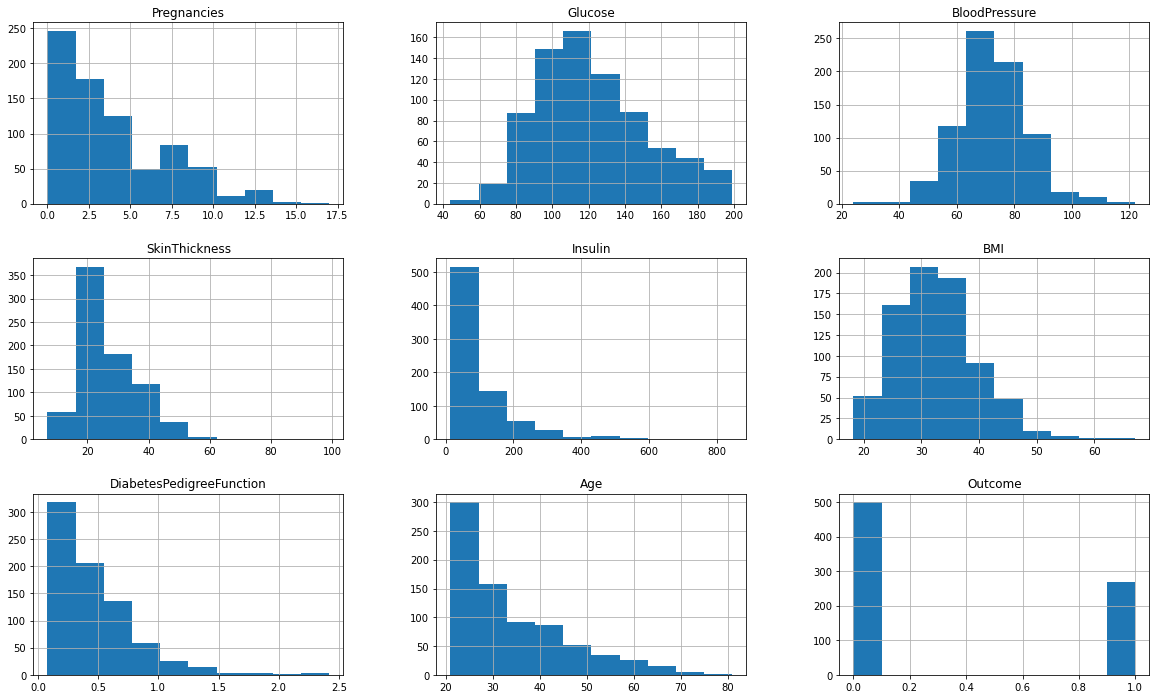

In [15]:
#plotting again after imputation 
data.hist(figsize=(20,12))
plt.show()

<AxesSubplot:xlabel='count', ylabel='Outcome'>

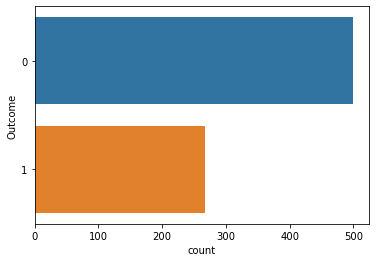

In [16]:
sns.countplot(data=data, y='Outcome')

In [17]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Data is biased towards no

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

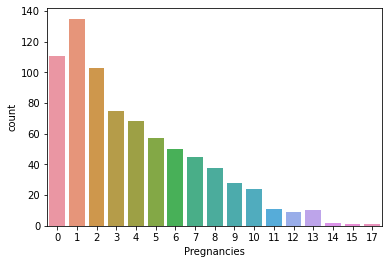

In [18]:
sns.countplot(data=data, x='Pregnancies')

In [19]:
#check dtypes
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

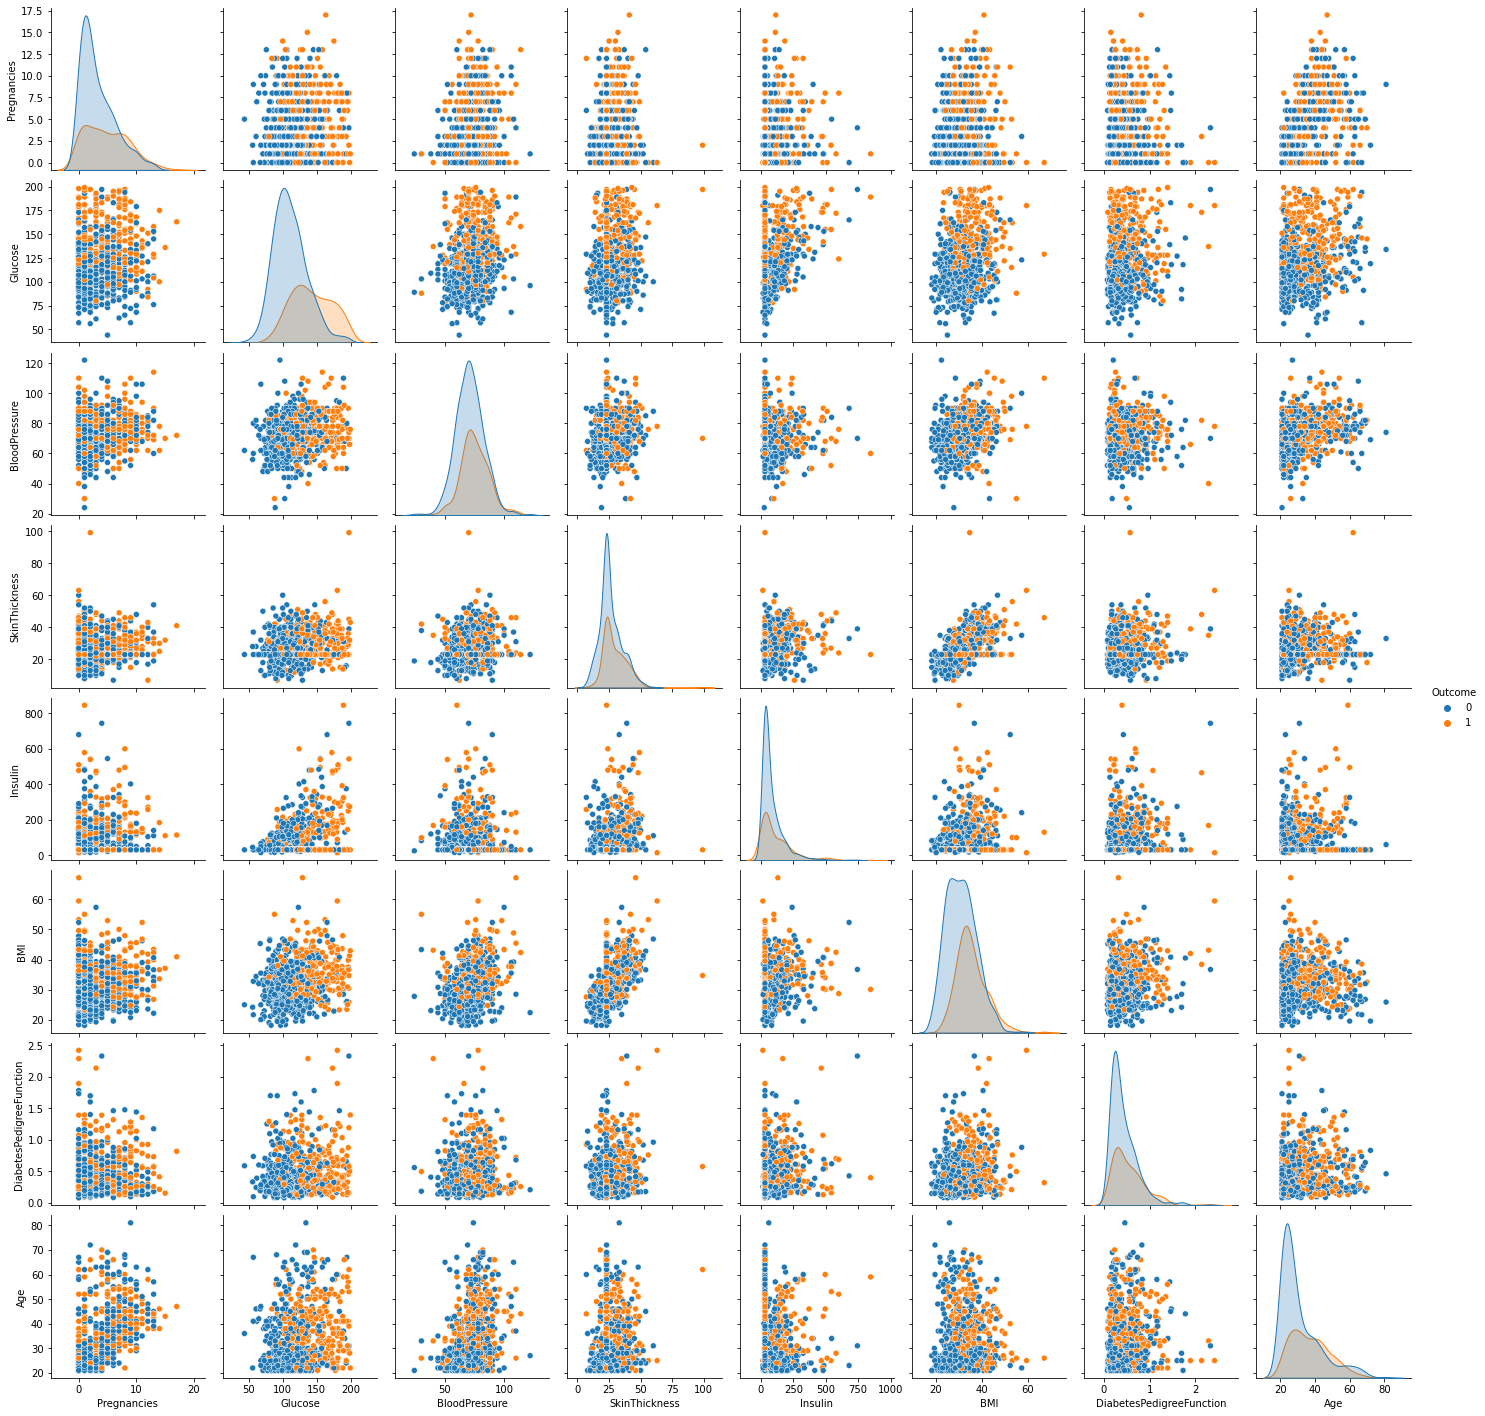

In [20]:
sns.pairplot(data=data, hue='Outcome')

<AxesSubplot:>

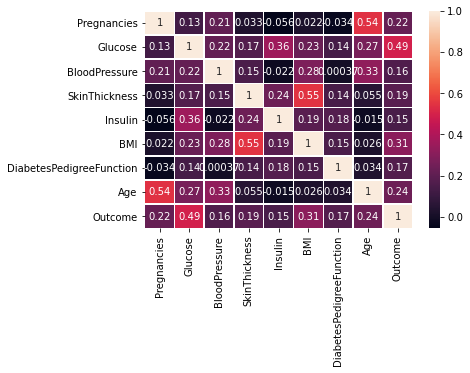

In [21]:
#check corr
sns.heatmap(data=data.corr(), annot=True, linewidths=.5)

In [22]:
corr = data.corr()
corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
BMI,0.021546,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


#### Data is not highly correlated

Check for features with single unique value

In [23]:
single_val = [feature for feature in data.columns if data[feature].nunique() == 1]

In [24]:
single_val

[]

No single unique values detected

## Scaling the data

In [26]:
X = data.drop('Outcome', axis=1)

#scaler
scaler = StandardScaler()
#scale x
X = pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                                                   'SkinThickness', 'Insulin',
                                                   'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [27]:
y = data['Outcome']

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549899,5.484909,-0.020496


### Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1/3, stratify=y) 

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 8), (256, 8), (512,), (256,))

### Dummy Classifier
We run a dummy model which equals 'a random guess'
Then we compare the results of the model to follow with our random guess

In [33]:
dummy = DummyClassifier('most_frequent')

“most_frequent”: always predicts the most frequent label in the training set.

In [34]:
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [35]:
y_pred_dum = dummy.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred_dum)

array([[167,   0],
       [ 89,   0]])

In [40]:
accuracy_score(y_test, y_pred_dum)

0.65234375

### Logistic Regression 

In [30]:
#object
log = LogisticRegression()

In [31]:
#fit
log.fit(X_train, y_train)

LogisticRegression()

In [32]:
#predict
y_pred_log = log.predict(X_test)

In [34]:
print('Accuracy Score' , accuracy_score(y_test, y_pred_log),'%')


Accuracy Score 0.7421875 %


In [136]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       167
           1       0.65      0.55      0.60        89

    accuracy                           0.74       256
   macro avg       0.72      0.70      0.70       256
weighted avg       0.74      0.74      0.74       256



In [38]:
confusion_matrix(y_test, y_pred_log)

array([[141,  26],
       [ 40,  49]])

### K-Neighbors

In [213]:
test_scores = []
train_scores = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    test_scores.append(knn.score(X_train, y_train))
    train_scores.append(knn.score(X_test, y_test))

In [214]:
test_scores = pd.DataFrame(test_scores)
train_scores = pd.DataFrame(train_scores)
clusters = pd.DataFrame(range(1,15))
final = pd.concat([clusters, train_scores, test_scores], axis=1)
final.columns=['clusters','train','test']
final.set_index('clusters')

,train,test
clusters,,
1,0.714844,1.000000
2,0.714844,0.839844
3,0.714844,0.861328
4,0.714844,0.800781
5,0.726562,0.847656
6,0.710938,0.806641
7,0.730469,0.814453
8,0.738281,0.783203
9,0.742188,0.806641


<AxesSubplot:>

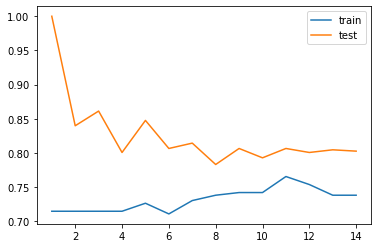

In [46]:
final.plot.line()

The best result is captured at k = 11 hence 11 is used for the final model

In [49]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.765625

In [50]:
confusion_matrix(y_test, y_pred_knn)

array([[143,  24],
       [ 36,  53]])

In [52]:
pd.crosstab(y_test, y_pred_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,36,53,89
All,179,77,256


In [53]:
corrmatt = confusion_matrix(y_test, y_pred_knn)

Text(0.5, 1.0, 'Confusion Matrix')

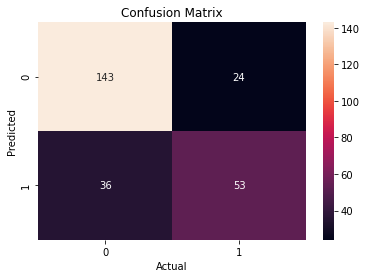

In [78]:
sns.heatmap(pd.DataFrame(corrmatt), annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [67]:
y_proba_knn = knn.predict_proba(X_test)[:,1]

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)

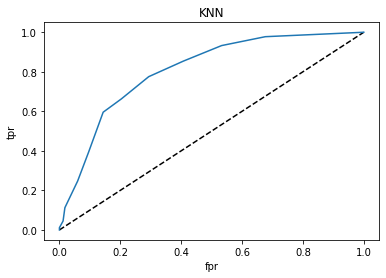

In [72]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN')
plt.show()

In [75]:
roc_auc_score(y_test, y_proba_knn)

0.8077777030209244

In [80]:
param_grid = {'n_neighbors' : range(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)})

In [83]:
print('Best Score', knn_cv.best_score_)
print('Best Params', knn_cv.best_params_)

Best Score 0.7774382480264833
Best Params {'n_neighbors': 19}


### Lets run a support vector classifier

In [99]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred_svm)

0.73828125

In [137]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       167
           1       0.66      0.52      0.58        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.69       256
weighted avg       0.73      0.74      0.73       256



In [111]:
confusion_matrix(y_test, y_pred_svm)

array([[143,  24],
       [ 43,  46]])

In [112]:
corrmatt2 = confusion_matrix(y_test, y_pred_svm)

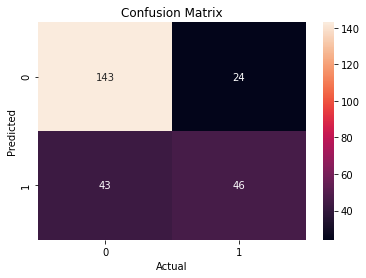

In [118]:
sns.heatmap(corrmatt2, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classifier

In [158]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [159]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [160]:
y_pred_dtc = dtc.predict(X_test)

In [161]:
accuracy_score(y_test, y_pred_dtc)

0.7265625

In [162]:
confusion_matrix(y_test, y_pred_dtc)

array([[144,  23],
       [ 47,  42]])

In [163]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       167
           1       0.65      0.47      0.55        89

    accuracy                           0.73       256
   macro avg       0.70      0.67      0.67       256
weighted avg       0.72      0.73      0.71       256



### GBoost

In [165]:
gbc = GradientBoostingClassifier(random_state=42)

In [168]:
parameters = {
    'learning_rate' : [0.05, 0.1, 0.5],
    'max_features' : [0.5, 1],
    'max_depth' : [3,4,5]
}
grid_search = GridSearchCV(gbc, parameters, cv=3, scoring='roc_auc')

In [170]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 4, 5], 'max_features': [0.5, 1]},
             scoring='roc_auc')

In [172]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1}
0.8114945453928506


In [178]:
gbc2 = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, 
                                  max_features=1, random_state=42)

In [179]:
gbc2.fit(X_train, y_train)

GradientBoostingClassifier(max_features=1, random_state=42)

In [180]:
y_pred_gbc2 = gbc2.predict(X_test)

In [181]:
accuracy_score(y_test, y_pred_gbc2)

0.734375

In [182]:
y_proba_gbc2 = gbc2.predict_proba(X_test)[:,1]

In [184]:
roc_auc_score(y_test, y_proba_gbc2)

0.8213684989571418

### Random Forest Classifier

In [190]:
rfc = RandomForestClassifier()

In [191]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [193]:
y_pred_rfc = rfc.predict(X_test)

In [194]:
accuracy_score(y_test, y_pred_rfc)

0.75390625

In [197]:
#proba
y_proba_rfc = rfc.predict_proba(X_test)[:,1]

In [198]:
roc_auc_score(y_test, y_proba_rfc)

0.8182399246450918

In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfc)

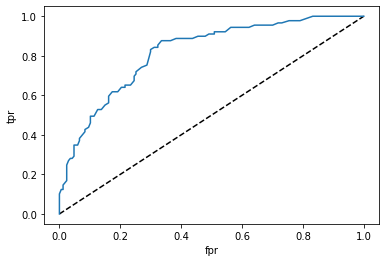

In [201]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

### XGBoost

Analysis
1. 